## Comportamiento Doze en Android para fetches

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from urllib.request import urlopen
import json
plt.rcParams['figure.figsize'] = [10, 5]
matplotlib.rcParams['timezone'] = 'AR'

link = 'link a URL'
f = urlopen(link)
myfile = f.read()


In [2]:
jsonData = json.loads(myfile)

In [3]:
def histogram(realTimeData, phoneModel, tripName):
    ping_list = [t['timestamp']/1e3 for t in realTimeData]
    ping_list = mdates.epoch2num(ping_list)
    fig, ax = plt.subplots(1,1)
    ax.hist(ping_list, bins=50, color='lightblue')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.locator_params(axis='y', nbins=10)
    ax.set_title('%s - %s'%(tripName, phoneModel))
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Solicitudes')
    plt.savefig(phoneModel+'_pingtest.jpg')
    plt.show()
   

/var/folders/fw/rwgc1g5904j4m0wl48kr3pyw0000gn/T/ipykernel_39956/529531230.py:3: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use `date2num(datetime.utcfromtimestamp(e))<.date2num>` instead.
  ping_list = mdates.epoch2num(ping_list)


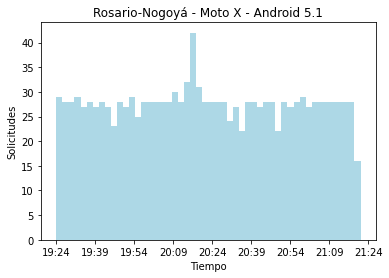

In [4]:
histogram(jsonData['realTimeData'], 'Moto X - Android 5.1', 'Rosario-Nogoyá')